## import modules

In [1]:
import numpy as np

from mikit.compname import TriChemFormula
from mikit.trigraph import TriGraph
from mikit.optim import BayesOpt

## load data

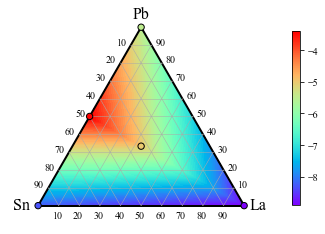

In [2]:
# Create chemical formula
atoms = ["Pb", "Sn", "La"]
tcf = TriChemFormula()

# Create comp name
comp_all = tcf.get_tri_name(atoms, delta = 0.05)
X_all = tcf.get_only_pseudo_ratio(comp_all,  atoms)

# Experimental composition and results
comp_exp = ["PbF2", "SnF2", "LaF3", "PbSnF4", "PbSnLaF7"]
X_exp = tcf.get_only_pseudo_ratio(comp_exp,  atoms)
y_exp = np.array([-5.5, -8.3, -8.9, -3.4, -5])

# Diagram of learninng data by linear distribution
tg_ld = TriGraph(atoms)
tg_ld.add_contourf(X_exp, y_exp)
tg_ld.add_plot(X_exp, y_exp)

## Bayesian Optimization

In [3]:
bo = BayesOpt(X_all)
bo.fit(X_exp, y_exp)
mu, sigma, ei = bo.get_info()

## Output triangle diagram

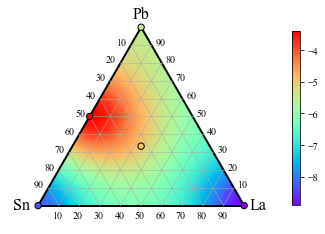

In [4]:
# Diagram of mu by gaussian distribution
tg_gd = TriGraph(atoms)
tg_gd.add_contourf(X_all, mu)
tg_gd.add_plot(X_exp, y_exp)

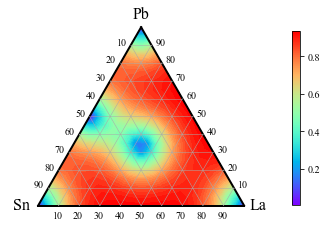

In [5]:
# Diagram of sigma by Gaussian process
tg_gd = TriGraph(atoms)
tg_gd.add_contourf(X_all, sigma)

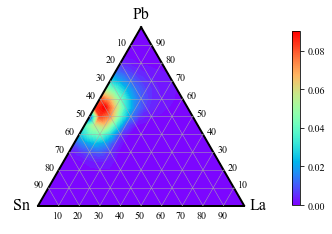

In [6]:
# Diagram of ei by gaussian process
tg_gd = TriGraph(atoms)
tg_gd.add_contourf(X_all, ei)

## Experimental composition recommended by Bayesian optimization.

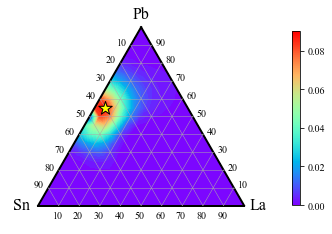

In [7]:
# Single recommend
n = 1
X_next = bo.get_next(n)
tg_1 = TriGraph(atoms)
tg_1.add_contourf(X_all, ei)
tg_1.add_plot(X_next, marktype = "b")

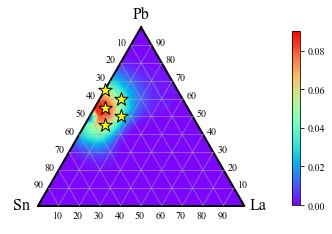

In [8]:
# 5 recommend, cutoff=0.1
n = 5
cutoff = 0.1
X_next = bo.get_next(n, cutoff)
tg_5_1 = TriGraph(atoms)
tg_5_1.add_contourf(X_all, ei)
tg_5_1.add_plot(X_next, marktype = "b")

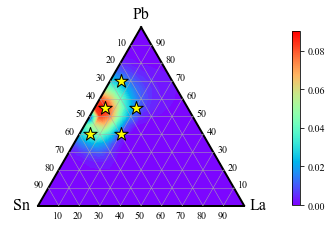

In [9]:
# Nth recommend, cutoff=0.2
n = 5
cutoff = 0.2
X_next = bo.get_next(n, cutoff)
tg_5_2 = TriGraph(atoms)
tg_5_2.add_contourf(X_all, ei)
tg_5_2.add_plot(X_next, marktype = "b")

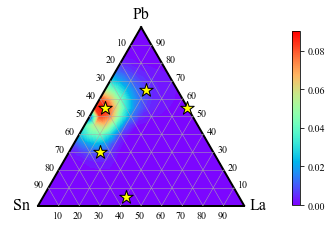

In [10]:
# Nth recommend, cutoff=0.3
n = 5
cutoff = 0.3
X_next = bo.get_next(n, cutoff)
tg_5_3 = TriGraph(atoms)
tg_5_3.add_contourf(X_all, ei)
tg_5_3.add_plot(X_next, marktype = "b")